# 1. Tidy Data 만들기

- 각 변수 (컬럼)는 각각의 열에 분리, 배치
- 각 관측치는 각각의 행에 분리, 배치
- 각 값은 개별 셀에 배치되야 한다

pew.csv

미국의 퓨리서치센터의 소득, 종교의 관계를 나타내는 데이터

wide data -> long data


In [2]:
import pandas as pd

In [3]:
pew_df = pd.read_csv('./data/pew.csv')
pew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [4]:
pew_df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [5]:
pew_df.tail(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
16,Other World Religions,5,2,3,4,2,7,3,4,4,8
17,Unaffiliated,217,299,374,365,341,528,407,321,258,597


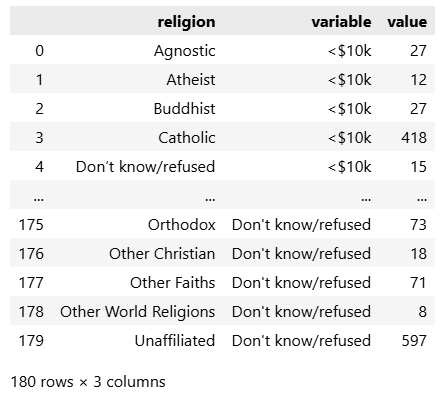

long data 로 만들기


In [6]:
pew_df.head(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


# melt()

- id_vars : 유지할 변수 리스트(튜플, 행렬)
- value_vars : 피봇 되돌리기 값으로 쓰일 열 목록
- var_name : 만들어지는 새 컬럼의 이름
- value_name : 새 컬럼의 값의 컬럼 이름

In [7]:
pew_df.melt(id_vars='religion')

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [8]:
pew_df.melt(id_vars='religion',
            var_name='income',
            value_name='count'
            )

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


billboard.csv

여러개의 열을 이용한 melt

In [9]:
billboard_df = pd.read_csv('./data/billboard.csv')
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   week          317 non-null    object 
 6   rating        317 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 17.5+ KB


In [10]:
billboard_df.head(3)

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0


In [11]:
id_vars = ['year', 'artist','track', 'time', 'date.entered' ]

b_melt_df = billboard_df.melt(id_vars=id_vars, var_name='week', value_name='rating')
b_melt_df.head()

ValueError: value_name (rating) cannot match an element in the DataFrame columns.

country_timeseries.csv

In [ ]:
data_file_name = 'country_timeseries.csv'
ebola_df = pd.read_csv('./data/'+data_file_name)
ebola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [ ]:
ebola_df.iloc[:5, [0,1,2,10]]

,Date,Day,Cases_Guinea,Deaths_Guinea
0,1/5/2015,289,2776.0,1786.0
1,1/4/2015,288,2775.0,1781.0
2,1/3/2015,287,2769.0,1767.0
3,1/2/2015,286,NaN,NaN
4,12/31/2014,284,2730.0,1739.0


In [ ]:
#1. 값 Cases~, Deaths~  id: Date, Day
ebola_long = ebola_df.melt(id_vars=['Date','Day'])
ebola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [ ]:
#2. column 값을 2개로 분할
variable_split = ebola_long['variable'].str.split('_')
type(variable_split)

pandas.core.series.Series

In [ ]:
variable_split[:5]

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object

In [ ]:
variable_split[0][0]

'Cases'

In [ ]:
status_values = variable_split.str.get(0) #cases, death
country_values = variable_split.str.get(1) #country
type(status_values)

pandas.core.series.Series

In [ ]:
status_values

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [ ]:
#3. 컬럼 추가
ebola_long['status'] = status_values
ebola_long['country'] = country_values
ebola_long[:5]

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


1~3 번을 빠르게 만들기

In [ ]:
ebola_long_1 = ebola_df.melt(id_vars=['Date','Day'])
variable_split1= ebola_long_1['variable'].str.split('_', expand=True)
ebola_long_1[['status', 'country']] = variable_split1
ebola_long_1.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


weather.csv

In [ ]:
weather_df = pd.read_csv('./data/weather.csv')
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       22 non-null     object 
 1   year     22 non-null     int64  
 2   month    22 non-null     int64  
 3   element  22 non-null     object 
 4   d1       2 non-null      float64
 5   d2       4 non-null      float64
 6   d3       4 non-null      float64
 7   d4       2 non-null      float64
 8   d5       8 non-null      float64
 9   d6       2 non-null      float64
 10  d7       2 non-null      float64
 11  d8       2 non-null      float64
 12  d9       0 non-null      float64
 13  d10      2 non-null      float64
 14  d11      2 non-null      float64
 15  d12      0 non-null      float64
 16  d13      2 non-null      float64
 17  d14      4 non-null      float64
 18  d15      2 non-null      float64
 19  d16      2 non-null      float64
 20  d17      2 non-null      float64
 21  d18      0 non-nul

In [ ]:
weather_df

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [ ]:
# 1. Day 언피벗 melt()
id_vars = ['id', 'year','month', 'element']

weather_melt= weather_df.melt(id_vars=id_vars, var_name='day', value_name='temp')
weather_melt.head(2)

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN


In [ ]:
# 2. element를 피봇팅 -. tmax, tmin 컬럼 생성
weather_tidy = weather_melt.pivot_table(
    index=['id', 'year','month','day'],
    columns= 'element',
    values='temp'
)
weather_tidy.head()

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4

In [ ]:
weather_tidy_flat = weather_tidy.reset_index()
weather_tidy_flat.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


In [ ]:
weather_tidy = weather_melt.pivot_table(
    index=['id', 'year','month','day'],
    columns= 'element',
    values='temp'
).reset_index()
weather_tidy.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


함수를 시리즈, 데이터프레임에 적용하기

1. 사용자 정의 함수 정의
def my_sq(x):
    return x**2

2. 데이터프레임.apply(my_sq)

In [ ]:
df = pd.DataFrame({"a": [10,20,30],
                   "b": [20,30,40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [ ]:
df['a']**2  # 백터화된 연산

0    100
1    400
2    900
Name: a, dtype: int64

In [ ]:
def my_sq(x):
    return x**2

In [ ]:
df['a'].apply(my_sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [ ]:
df.iloc[0]

a    10
b    20
Name: 0, dtype: int64

In [ ]:
df.iloc[0].apply(my_sq)

a    100
b    400
Name: 0, dtype: int64

In [ ]:
# 매개변수 2개 함수 정의
def my_exp(x,y):
    return x**y

In [ ]:
my_exp(2,3)

8

In [ ]:
df.iloc[0]

a    10
b    20
Name: 0, dtype: int64

In [ ]:
df.iloc[0].apply(my_exp,y=3)

a    1000
b    8000
Name: 0, dtype: int64

In [ ]:
df['a'].apply(my_exp,y=3)

0     1000
1     8000
2    27000
Name: a, dtype: int64

In [ ]:
def print_me(x):
    print(x)
    print(type(x))

In [ ]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [ ]:
df.apply(print_me)

0    10
1    20
2    30
Name: a, dtype: int64
<class 'pandas.core.series.Series'>
0    20
1    30
2    40
Name: b, dtype: int64
<class 'pandas.core.series.Series'>


a    None
b    None
dtype: object

In [ ]:
df.apply(print_me, axis=1)

a    10
b    20
Name: 0, dtype: int64
<class 'pandas.core.series.Series'>
a    20
b    30
Name: 1, dtype: int64
<class 'pandas.core.series.Series'>
a    30
b    40
Name: 2, dtype: int64
<class 'pandas.core.series.Series'>


0    None
1    None
2    None
dtype: object

In [12]:
import pandas as pd

data = {
    'Name': ['Alice','Bob','Charlia','David', 'Eve'],
    'Age': [25,43,35,32,29],
    'Salary':[5000,7000,6500,5500,6000]
}
df =pd.DataFrame(data)
df

,Name,Age,Salary
0,Alice,25,5000
1,Bob,43,7000
2,Charlia,35,6500
3,David,32,5500
4,Eve,29,6000


In [16]:
def age_catagory(age):
    if age<30:
        return '20대'
    elif age<40:
        return '30대'
    else:
        return '40대이상'
age_catagory(25)

'20대'

In [15]:
# catagory컬럼으로 추가
df['catagory'] = df['Age'].apply(age_catagory)
df

,Name,Age,Salary,catagory
0,Alice,25,5000,20대
1,Bob,43,7000,40대이상
2,Charlia,35,6500,30대
3,David,32,5500,30대
4,Eve,29,6000,20대


In [18]:
# 보너스 함수
def calc_bonus(salary):
    return salary*0.3
df['bonus'] = df['Salary'].apply(calc_bonus)
df

,Name,Age,Salary,catagory,bonus
0,Alice,25,5000,20대,1500.0
1,Bob,43,7000,40대이상,2100.0
2,Charlia,35,6500,30대,1950.0
3,David,32,5500,30대,1650.0
4,Eve,29,6000,20대,1800.0


# 3. 데이터 연결/결합하기
concat() + axis =

In [20]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')
df1, df2, df3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [21]:
total_df = pd.concat([df1,df2,df3]) # 컬럼수가 동일해야함
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [22]:
total_df.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,0,a4,b4,c4,d4
5,1,a5,b5,c5,d5
6,2,a6,b6,c6,d6
7,3,a7,b7,c7,d7
8,0,a8,b8,c8,d8
9,1,a9,b9,c9,d9


In [23]:
total_df = pd.concat([df1,df2,df3], ignore_index=True)
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [33]:
add_s = pd.Series(
    data=['a100','b100','c100','d100'],
    index=['A','B','C','D'])
add_s

A    a100
B    b100
C    c100
D    d100
dtype: object

In [28]:
pd.concat([df1,add_s])

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,a100
1,NaN,NaN,NaN,NaN,b100
2,NaN,NaN,NaN,NaN,c100
3,NaN,NaN,NaN,NaN,d100


In [37]:
new_row = pd.DataFrame(data=[['a100','b100','c100','d100']],  # add_s = pd.Series(['a100','b100','c100','d100'])
             columns=['A','B','C','D'])
new_row

,A,B,C,D
0,a100,b100,c100,d100


In [31]:
pd.concat([df1,new_row])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a100,b100,c100,d100


In [38]:
empty_df =pd.DataFrame(columns=['A','B','C','D'])
empty_df.loc[0] =add_s
empty_df

,A,B,C,D
0,a100,b100,c100,d100


## 3-2. 열 연결하기
concat( [], axis =1 ) # colums


In [39]:
df1,df2,df3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [46]:
col_concat =pd.concat([df1,df2,df3], axis = 'columns')
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [47]:
col_concat['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [48]:
col_concat['new_col'] = ['n1','n2','n3','n4']
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [50]:
#ignore_index
col_concat_1 =pd.concat([df1,df2,df3], axis = 'columns', ignore_index=True)
col_concat_1

# series 추가 

# add_s = pd.Series(
#     data=['a100','b100','c100','d100'],
#     index=['A','B','C','D'])
# add_s


,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


## 3-3. 병합
concat(join='inner'/'outer')

In [52]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']
pd.concat([df1,df2,df3])

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [54]:
pd.concat([df1,df2,df3], join='inner') # 곂치는 컬럼만 출력

""
0
1
2
3
0
1
2
3
0
1


In [55]:
pd.concat([df1,df3], join='inner')

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11


In [56]:
pd.concat([df2,df3], join='inner')

,F,H
0,b4,d4
1,b5,d5
2,b6,d6
3,b7,d7
0,c8,d8
1,c9,d9
2,c10,d10
3,c11,d11


In [59]:
# 열방향향으로 병합 -> index같은 것들끼리 병합
df1.index = [0, 1, 2, 3]
df2.index = [4, 5, 6, 7]
df3.index = [0, 2, 5, 7]
df1,df2,df3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     E   F   G   H
 4  a4  b4  c4  d4
 5  a5  b5  c5  d5
 6  a6  b6  c6  d6
 7  a7  b7  c7  d7,
      A    C    F    H
 0   a8   b8   c8   d8
 2   a9   b9   c9   d9
 5  a10  b10  c10  d10
 7  a11  b11  c11  d11)

In [62]:
pd.concat([df1,df3],axis='columns',join='inner') 

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


# 열병합 연습

In [ ]:
import pandas as pd

# 월별 매출 데이터
january = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales': [200, 250]
})

february = pd.DataFrame({
    'Date': ['2023-02-01', '2023-02-02'],
    'Sales': [300, 350]
})

In [65]:
january,february

(         Date  Sales
 0  2023-01-01    200
 1  2023-01-02    250,
          Date  Sales
 0  2023-02-01    300
 1  2023-02-02    350)

In [67]:
pd.concat([january,february], ignore_index=True)

,Date,Sales
0,2023-01-01,200
1,2023-01-02,250
2,2023-02-01,300
3,2023-02-02,350


In [64]:

# 상점 A의 매출 데이터
store_a = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_A': [200, 250]
})

# 상점 B의 매출 데이터
store_b = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_B': [300, 350]
})

In [69]:
store_a,store_b

(         Date  Sales_A
 0  2023-01-01      200
 1  2023-01-02      250,
          Date  Sales_B
 0  2023-01-01      300
 1  2023-01-02      350)

In [85]:
store_a1 = store_a.set_index('Date')
store_b2 = store_b.set_index('Date')

In [86]:
pd.concat([store_a1,store_b2], axis=1)



,Sales_A,Sales_B
Date,,
2023-01-01,200,300
2023-01-02,250,350


In [90]:
store_c = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03'],
    'Sales_C': [220, 280]
})

store_c

,Date,Sales_C
0,2023-01-01,220
1,2023-01-03,280


In [89]:
store_d = pd.DataFrame({
    'Date': ['2023-01-02', '2023-01-03'],
    'Sales_D': [330, 370]
})
store_d

,Date,Sales_D
0,2023-01-02,330
1,2023-01-03,370


In [94]:
store_c1 = store_c.set_index('Date')
store_d1 = store_d.set_index('Date')

In [98]:
pd.concat([store_c1,store_d1], axis=1,join='outer')  # join='outer' 기본값

,Sales_C,Sales_D
Date,,
2023-01-01,220.0,NaN
2023-01-03,280.0,370.0
2023-01-02,NaN,330.0


In [ ]:
# 파일로 결합하기
# barnett-ylkim hipython_rep main data-billboard-by_week

In [113]:
from pathlib import Path
data_files = Path("./").glob("data/billboard-by_week/billboard-*.csv")

In [114]:
b_data_files = sorted(list(data_files))
b_data_files

[WindowsPath('data/billboard-by_week/billboard-01.csv'),
 WindowsPath('data/billboard-by_week/billboard-02.csv'),
 WindowsPath('data/billboard-by_week/billboard-03.csv'),
 WindowsPath('data/billboard-by_week/billboard-04.csv'),
 WindowsPath('data/billboard-by_week/billboard-05.csv'),
 WindowsPath('data/billboard-by_week/billboard-06.csv'),
 WindowsPath('data/billboard-by_week/billboard-07.csv'),
 WindowsPath('data/billboard-by_week/billboard-08.csv'),
 WindowsPath('data/billboard-by_week/billboard-09.csv'),
 WindowsPath('data/billboard-by_week/billboard-10.csv'),
 WindowsPath('data/billboard-by_week/billboard-11.csv'),
 WindowsPath('data/billboard-by_week/billboard-12.csv'),
 WindowsPath('data/billboard-by_week/billboard-13.csv'),
 WindowsPath('data/billboard-by_week/billboard-14.csv'),
 WindowsPath('data/billboard-by_week/billboard-15.csv'),
 WindowsPath('data/billboard-by_week/billboard-16.csv'),
 WindowsPath('data/billboard-by_week/billboard-17.csv'),
 WindowsPath('data/billboard-by

In [ ]:
for b_data_files[0] in b_data_files


In [120]:
b_data_files[0]

WindowsPath('data/billboard-by_week/billboard-01.csv')

In [121]:
b_01 = pd.read_csv(b_data_files[0])
b_01

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk1,86.0
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk1,85.0
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk1,95.0
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk1,99.0


In [129]:
list_b_df = [] # 전체파일
for b_data_file in b_data_files:
    df = pd.read_csv(b_data_file)
    list_b_df.append(df)
len(list_b_df)


76

In [130]:
list_b_df[0].head()

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [131]:
final_df =pd.concat(list_b_df)
final_df.shape

(24092, 7)

In [ ]:
# 매출 데이터
sales_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Amount': [250, 300, 150, 400]
})

# 고객 데이터
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'],
    'Region': ['North', 'South', 'East', 'West']
})

In [133]:
sales_data

,CustomerID,Date,Amount
0,101,2023-01-01,250
1,102,2023-01-03,300
2,103,2023-01-05,150
3,104,2023-01-07,400


In [134]:
customer_data

,CustomerID,Name,Region
0,101,Alice,North
1,102,Bob,South
2,103,Charlie,East
3,105,Eva,West


In [ ]:
pd.merge(sales_data,customer_data, on='CustomerID')  #join:'inner'

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East


In [ ]:
pd.merge(sales_data,customer_data, on='CustomerID',how='outer') 

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,104,2023-01-07,400.0,NaN,NaN
4,105,NaN,NaN,Eva,West


In [ ]:
pd.merge(sales_data,customer_data, on='CustomerID',how='left')  # sales_data기준

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East
3,104,2023-01-07,400,NaN,NaN


In [142]:
pd.merge(sales_data,customer_data, on='CustomerID',how='right')  # customer_data기준

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,105,NaN,NaN,Eva,West


In [ ]:
# 4. 그룹 연산하기
groupby(), aggregate()

In [2]:
import pandas as pd  

df = pd.read_csv('./data/gapminder.tsv',sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [3]:
df['country'].unique().shape

(142,)

In [4]:
# 국가별 기대평균수명
df.groupby('country')['lifeExp'].mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

count()
size()
mean()
std()
quantitle()
max(),min(),sum(),var(),describe()

## numpy함수
np.max(), np.sum(), np.var()

In [5]:
df.groupby('continent')['lifeExp'].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: lifeExp, dtype: int64

In [11]:
import numpy as np
df.groupby('continent')['lifeExp']\
    .agg([np.mean, np.std, np.min ,np.max])

C:\Users\Admin\AppData\Local\Temp\ipykernel_13392\124670860.py:3: FutureWarning: The provided callable <function mean at 0x00000283B65D3380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg([np.mean, np.std, np.min ,np.max])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13392\124670860.py:3: FutureWarning: The provided callable <function std at 0x00000283B65D34C0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  .agg([np.mean, np.std, np.min ,np.max])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13392\124670860.py:3: FutureWarning: The provided callable <function min at 0x00000283B65D2AC0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the strin

,mean,std,min,max
continent,,,,
Africa,48.865330,9.150210,23.599,76.442
Americas,64.658737,9.345088,37.579,80.653
Asia,60.064903,11.864532,28.801,82.603
Europe,71.903686,5.433178,43.585,81.757
Oceania,74.326208,3.795611,69.120,81.235


In [12]:
agg_df = df.groupby('continent')\
    .agg(
        {
            'lifeExp': 'mean',
            'pop': 'median',
            'gdpPercap': 'median'
        }
    )
agg_df

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,4579311.0,1192.138217
Americas,64.658737,6227510.0,5465.509853
Asia,60.064903,14530830.5,2646.786844
Europe,71.903686,8551125.0,12081.749115
Oceania,74.326208,6403491.5,17983.303955
